In [168]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [169]:
#importing csvs, reading and merging
filepath = os.path.join("raw_data", "city_data.csv")
filepath2 = os.path.join("raw_data", "ride_data.csv")

city_df = pd.read_csv(filepath)
ride_df = pd.read_csv(filepath2)

city_df = city_df.drop_duplicates('city', keep = 'first')

merged_df = city_df.merge(ride_df, on = 'city')


In [170]:
#Setting colors for bubble plot
colors = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}

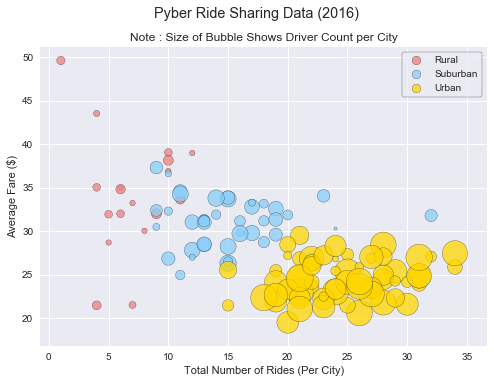

In [177]:
#grouping cities
cities = merged_df.groupby('city')

# average fare per city
avgerage_fare = cities.mean()['fare']

ride_count = cities['ride_id'].count()

# driver count
driver_count = cities.mean()['driver_count']

# type of city
city_type = city_df.set_index('city')['type']

# dataframe
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})


city_info.sort_values('Number of Drivers', ascending = False)

# df for city type
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

#Colors
city_color = {'Urban': colors['Gold'], 'Suburban': colors['Light Sky Blue'], 'Rural': colors['Light Coral']}

plt.suptitle('Pyber Ride Sharing Data (2016)')

# scatter plots for city types
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#print plots
plt.title('Note : Size of Bubble Shows Driver Count per City')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')



lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()

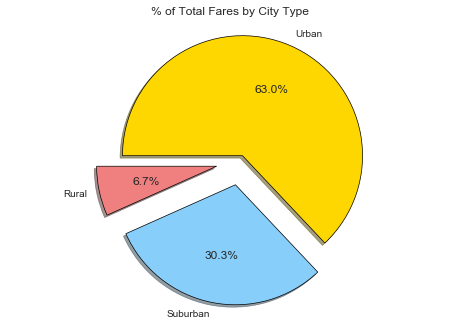

In [190]:
#group by type 
types = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#fare by city
fare_sum = types.sum()['fare']

#pie chart
labels = fare_sum.index

# explode
colors = [city_color[n] for n in labels]
explode = [0.2 , 0.2, .05]
plt.pie(fare_sum, startangle = 180, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .7, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

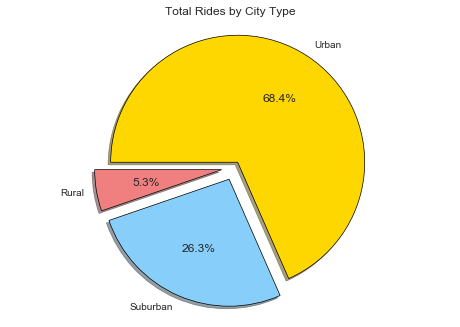

In [185]:
# rides per city type
ride_sum = by_type.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, startangle = 180, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .7, 'edgecolor': 'black'})
plt.title('Total Rides by City Type')
plt.axis('equal')
plt.show()

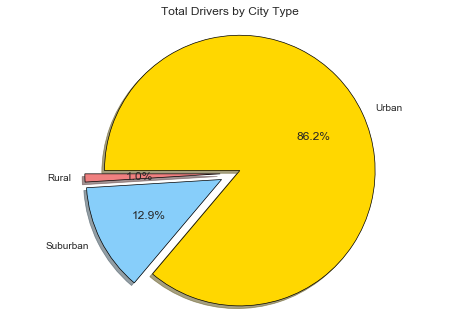

In [186]:
# number of drivers per city type
driver_sum = by_type.sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 180, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .7, 'edgecolor': 'black'})
plt.title('Total Drivers by City Type')
plt.axis('equal')
plt.show()